In [ ]:
#Loading the Data:

In [2]:

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")


In [3]:
import pandas as pd
df=pd.read_csv("C:/Users/yashu/Downloads/archive (6).zip")

In [4]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [5]:
df.tail()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18
237,238,31,51000,340,5.6,North,17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [7]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [8]:
df.columns

Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'region', 'purchase_frequency'],
      dtype='object')

In [9]:
#Handling missing values:

In [10]:
df.isnull().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [11]:
#.converting Categorical Variables:

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'region' column
df['region'] = label_encoder.fit_transform(df['region'])
# Print the DataFrame to see the changes
print(df.head())

   user_id  age  annual_income  purchase_amount  loyalty_score  region  \
0        1   25          45000              200            4.5       1   
1        2   34          55000              350            7.0       2   
2        3   45          65000              500            8.0       3   
3        4   22          30000              150            3.0       0   
4        5   29          47000              220            4.8       1   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


In [13]:
# Visualizing Data:
# Histograms:

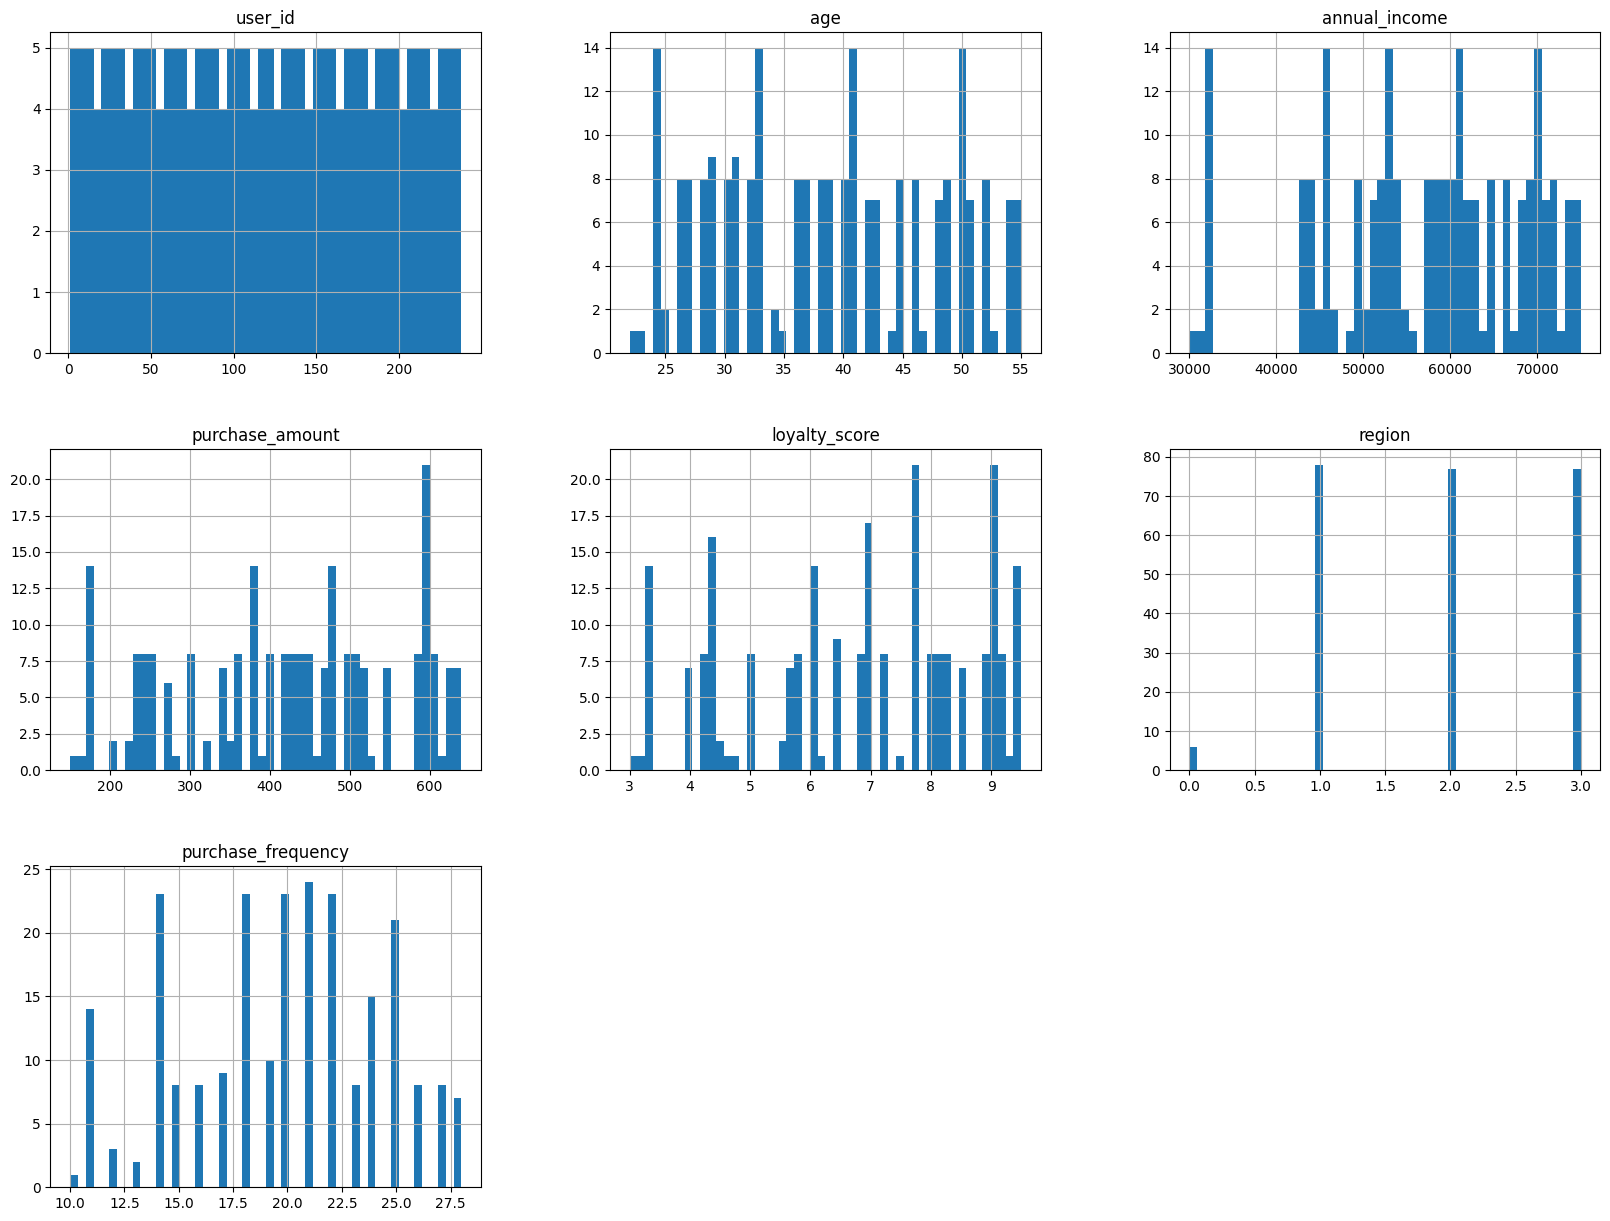

In [14]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

df.hist(bins=50, figsize=(20, 15))  # Create histogram
plt.show()  


In [15]:
numeric_values=df.select_dtypes(include=['number'])
print(numeric_values)

     user_id  age  annual_income  purchase_amount  loyalty_score  region  \
0          1   25          45000              200            4.5       1   
1          2   34          55000              350            7.0       2   
2          3   45          65000              500            8.0       3   
3          4   22          30000              150            3.0       0   
4          5   29          47000              220            4.8       1   
..       ...  ...            ...              ...            ...     ...   
233      234   40          60000              450            7.2       3   
234      235   38          59000              430            6.9       1   
235      236   54          74000              630            9.4       2   
236      237   32          52000              360            5.8       3   
237      238   31          51000              340            5.6       1   

     purchase_frequency  
0                    12  
1                    18  
2        

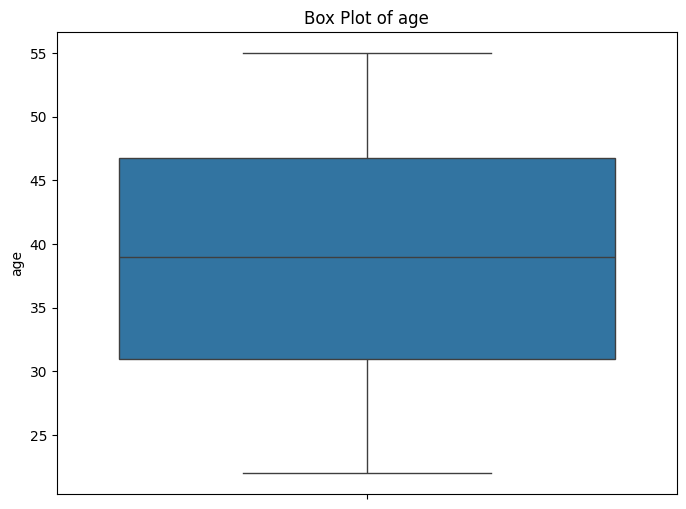

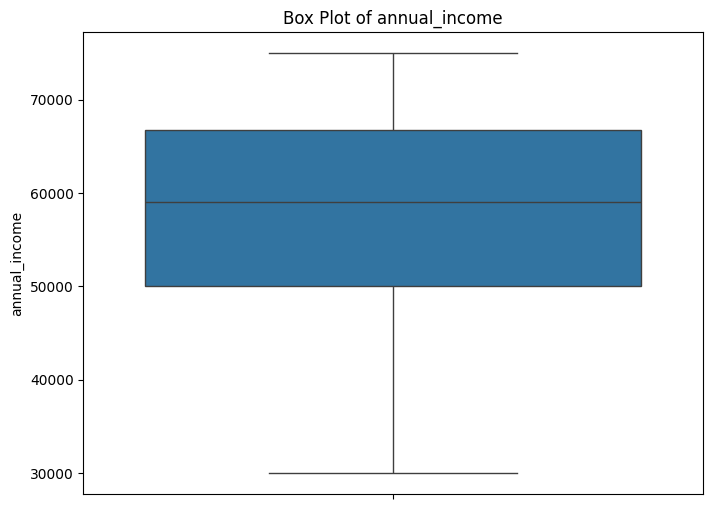

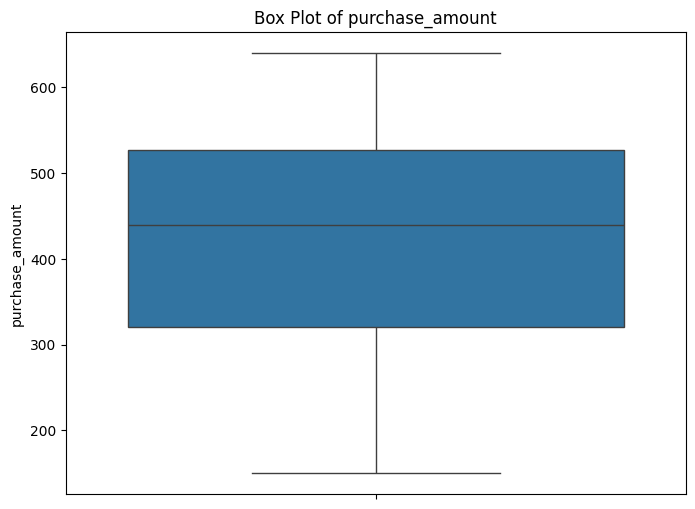

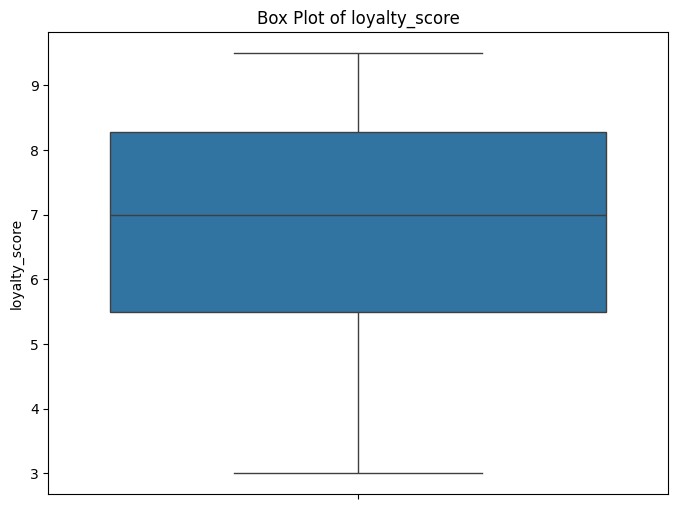

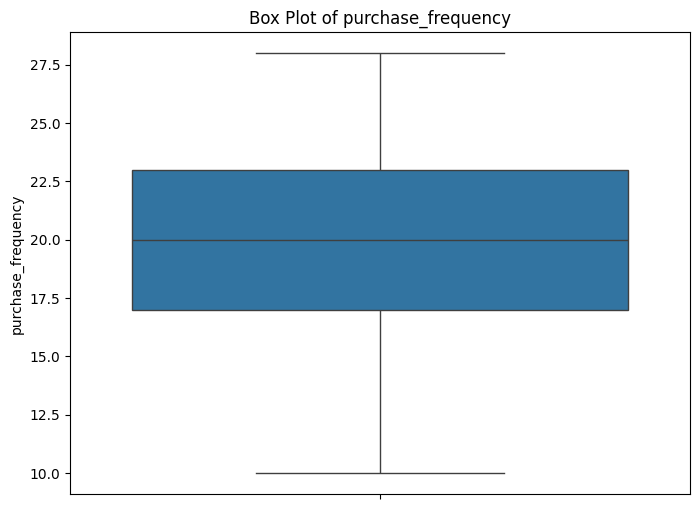

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# Check for any null values and handle them if necessary
df = df.dropna()

In [19]:
print(df.columns.tolist())



['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score', 'region', 'purchase_frequency']


In [20]:

X = df.drop('purchase_amount', axis=1)
y = df['purchase_amount']


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [22]:
# Ensure dataset is loaded and preprocessed
numerical_features = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']

data = df[numerical_features]


<Axes: >

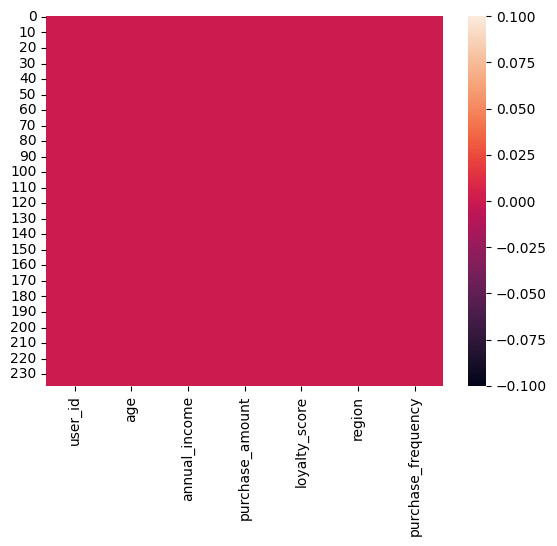

In [23]:
import seaborn as sns
sns.heatmap(df.isna())

<Axes: >

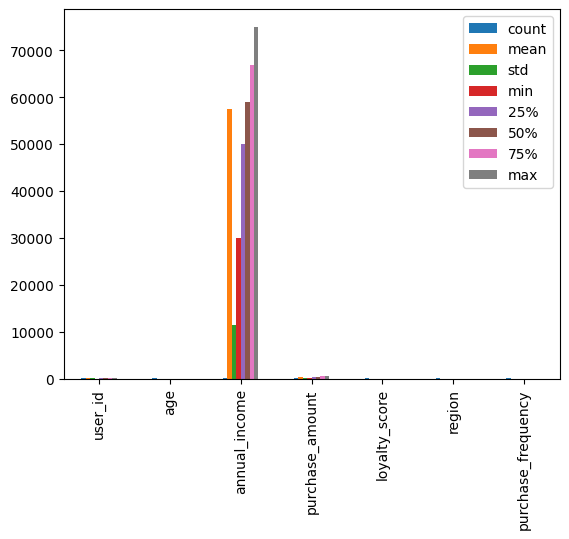

In [24]:

df.describe().T.plot(kind='bar')

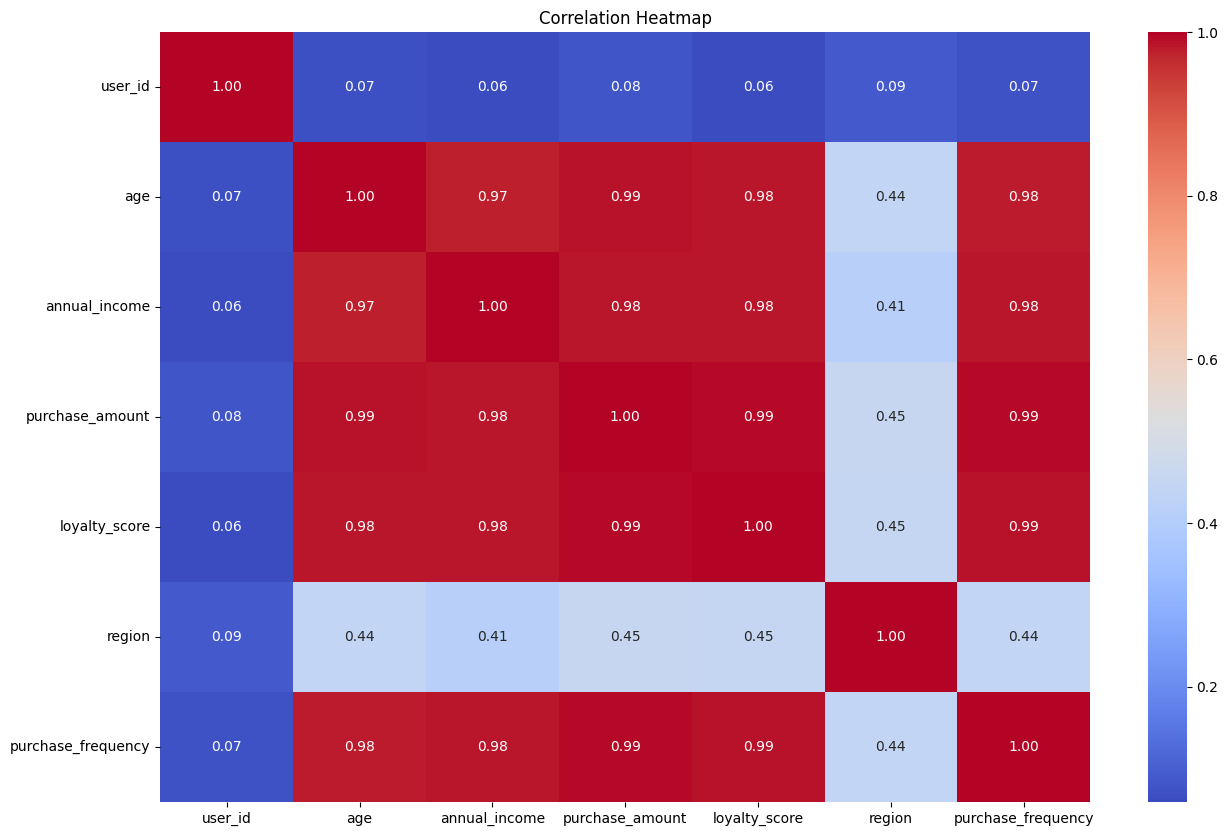

In [25]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

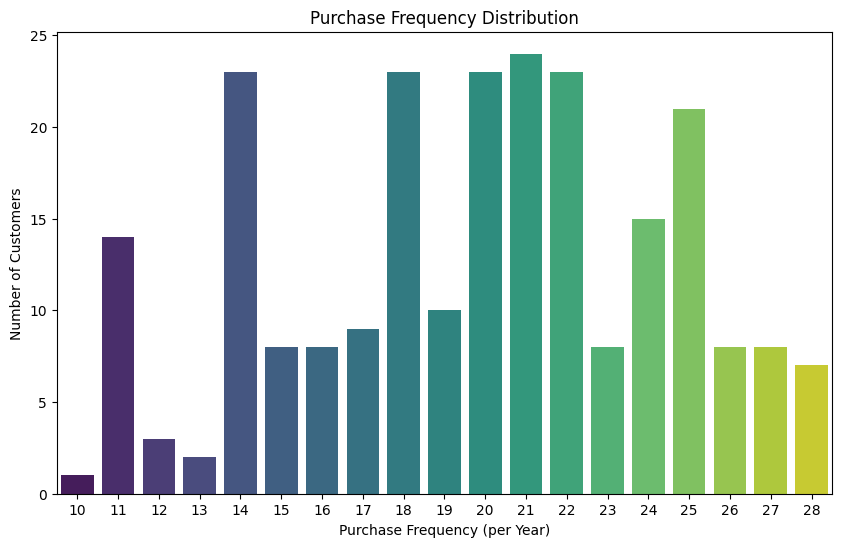

In [26]:


plt.figure(figsize=(10,6))
sns.countplot(x='purchase_frequency', data=df, palette='viridis')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency (per Year)')
plt.ylabel('Number of Customers')
plt.show()

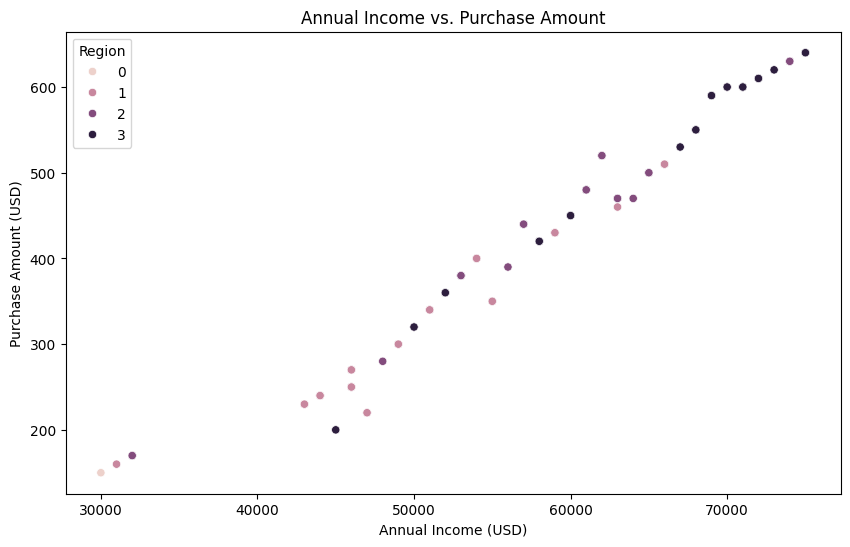

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_income', y='purchase_amount', data=df, hue='region')
plt.title('Annual Income vs. Purchase Amount')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Region')
plt.show()

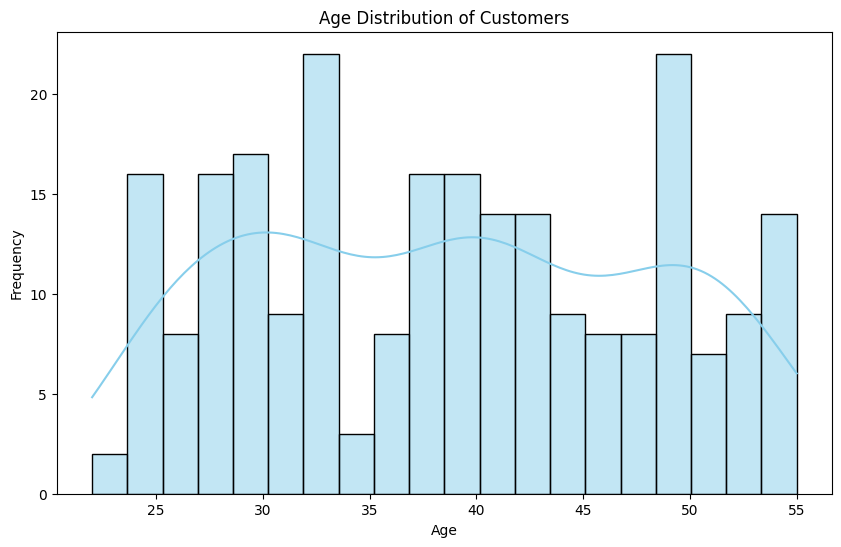

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [29]:
df.columns.tolist()

['user_id',
 'age',
 'annual_income',
 'purchase_amount',
 'loyalty_score',
 'region',
 'purchase_frequency']

In [30]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

df
# Define the columns you want to plot
columns = ['user_id',
 'age',
 'annual_income',
 'purchase_amount',
 'loyalty_score',
 'region',
 'purchase_frequency']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                 x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='black',  # Background color of the paper
                plot_bgcolor='black',   # Background color of the plot area
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'},
                font=dict(color='white')  # Font color for text in plots
            )
                
            
            # Show the figure
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='black',  # Background color of the paper
                plot_bgcolor='black',   # Background color of the plot area
                title_font=dict(size=18, family="Arial"),
                font=dict(color='white')  # Font color for text in plots
            )
            
            # Show the figure
            fig.show()
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")
            

In [32]:
df

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,1,12
1,2,34,55000,350,7.0,2,18
2,3,45,65000,500,8.0,3,22
3,4,22,30000,150,3.0,0,10
4,5,29,47000,220,4.8,1,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,3,20
234,235,38,59000,430,6.9,1,20
235,236,54,74000,630,9.4,2,27
236,237,32,52000,360,5.8,3,18


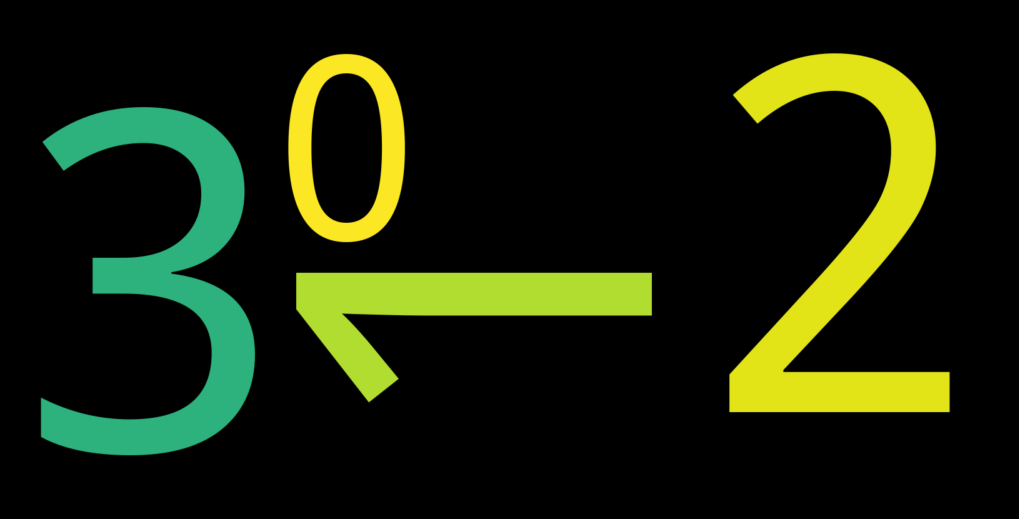

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["region"].dropna().apply(lambda x: str(x)))
# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [35]:
y_pred = lr_model.predict(X_test)


In [41]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error
)
import numpy as np

In [40]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score:", round(r2, 3))
print("RMSE    :", round(r2, 3))


R² score: 0.996
RMSE    : 0.996


In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [44]:
print(f"R² Score : {r2:.3f}")
print(f"RMSE     : {rmse:.2f}")
print(f"MAE      : {mae:.2f}")


R² Score : 0.996
RMSE     : 9.93
MAE      : 6.98


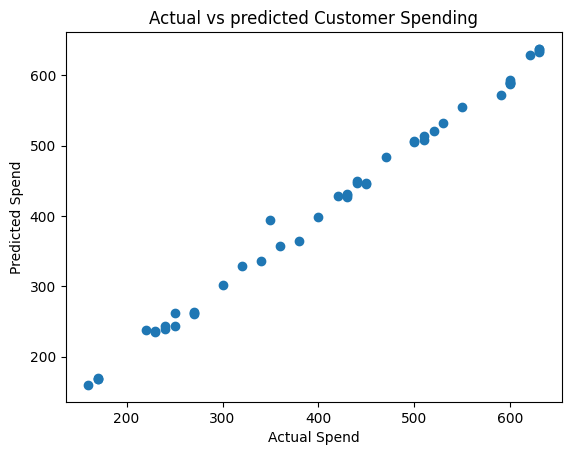

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Spend")
plt.ylabel("Predicted Spend")
plt.title("Actual vs predicted Customer Spending")
plt.show()